In [130]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [48]:
df = pd.read_csv('data/digital_marketing_campaign_dataset.csv')

# **Exploring the Dataframe**

In [51]:
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [53]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n", df.describe().transpose())

# Call the function
get_df_info(df)


Shape of DataFrame:  (8000, 20)

Columns in DataFrame:  ['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'AdvertisingPlatform', 'AdvertisingTool', 'Conversion']

Data types of columns:
 CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion      

**What we find out about the datafarme**

*  **We got a dataframe which has 8000 rows and 20 columns.** 
*  **'AdvertisingPlatform' & 'AdvertisingTool' are confidential columns which we will drop them from our  study.**
*  **Conversion is the Target Variable with Binary Inputs. So we will perform a Binary Classification task here.**
*  **There are no Null(NaN) values and duplicate values in this dataframe.**

**On further exploration we see some specific observations about the data:**

**CustomerID:** All values are unique (count equals the number of rows).

**Age:** The average age is around 43.6 years old, with a range of 18 to 69 years old (based on min and max values).

**Income:** The average income is around $84,664, with a significant standard deviation, indicating a spread in income levels.

**Click Through Rate (CTR) and Conversion Rate:** The average CTR is 0.15%, and the average conversion rate is 0.10%. Both values are relatively low.

**Website Visits:** The average number of website visits per customer is around 24.75

In [57]:
# Dropping the 'AdvertisingPlatform' & 'AdvertisingTool' columns.
df = df.drop(['AdvertisingPlatform', 'AdvertisingTool'], axis=1)

# **Campaign Success Metrics**

**1. Conversion Rate**
Calculate the conversion rate as the percentage of users who converted (e.g., made a purchase) divided by the total number of users.

In [61]:
# Conversion Rate
conversion_rate = df['Conversion'].sum() / len(df) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")


Conversion Rate: 87.65%


**2. Cost per Acquisition (CPA):** Calculate the CPA by dividing the total campaign cost by the number of acquired customers.

In [64]:
total_cost = df['AdSpend'].sum()
total_customers = len(df[df['Conversion'] == 1])
cpa = total_cost / total_customers
print(f"Cost per Acquisition (CPA): ${cpa:.2f}")

Cost per Acquisition (CPA): $5705.58


**3. Return on Investment (ROI):** Calculate the ROI by comparing the revenue generated (e.g., from conversions) to the campaign cost.

**Since we don’t have a specific revenue column, we can estimate the ROI using alternative approaches. Here are a couple of options:**

**Average Revenue per Conversion:** Calculate the average revenue generated per conversion (assuming we have a total revenue value for the entire campaign).

In [69]:
total_revenue = 100000  # Replace with your actual total revenue
total_conversions = len(df[df['Conversion'] == 1])
avg_revenue_per_conversion = total_revenue / total_conversions
roi_alternative = (avg_revenue_per_conversion - total_cost) / total_cost * 100
print(f"Alternative ROI (Avg. Revenue per Conversion): {roi_alternative:.2f}%")


Alternative ROI (Avg. Revenue per Conversion): -100.00%


A negative ROI (Avg. Revenue per Conversion) of -100.00% indicates that the marketing campaign is generating a significant loss. This means that, on average, the cost of acquiring a conversion is greater than the revenue generated from that conversion. In other words, for every dollar spent on marketing, the campaign is losing $1.

**4. Click-Through Rate (CTR):**
Calculate the CTR as the percentage of clicks relative to impressions (views).

In [73]:
ctr = (df['ClickThroughRate'].sum() / len(df)) * 100
print(f"Click-Through Rate (CTR): {ctr:.2f}%")


Click-Through Rate (CTR): 15.48%


**5. Bounce Rate:** Calculate the bounce rate as the percentage of single-page visits.

In [76]:
single_page_visits = len(df[df['PagesPerVisit'] == 1])
total_visits = len(df)
bounce_rate = (single_page_visits / total_visits) * 100
print(f"Bounce Rate: {bounce_rate:.2f}%")

Bounce Rate: 0.00%


A Bounce Rate of 0.00% in your marketing campaign data most likely indicates a data quality issue rather than a perfect campaign. Here's why:

**Unrealistic Scenario:** It's highly improbable that  every single visitor interacted with your website in some way. There will always be some visitors who leave immediately without any interaction.

**Tracking Issues:** A 0% bounce rate might suggest that your website analytics are not set up correctly or there might be glitches in data reporting. This could be due to faulty tracking codes or errors in how user interactions are captured.

**What to do next:**

**Investigate Analytics Setup:** Double-check your website analytics setup to ensure accurate tracking.
Look for Other Metrics: While a bounce rate of zero might seem positive, analyze other metrics like conversion rate and time on site to get a better understanding of user engagement.
Here are some alternative interpretations of a very low bounce rate (not necessarily 0%):

**Highly Relevant Audience:** If your target audience is very specific and well-defined, a very low bounce rate could indicate you're reaching the right people who are interested in your offering.

**Engaging Landing Page:** A well-designed landing page with a clear call to action might lead to a lower bounce rate as users find the information they're looking for and take the desired action.

Remember, a bounce rate isn't the sole indicator of a successful marketing campaign. It's crucial to analyze it along with other website analytics to get a comprehensive picture of user behavior.

**6. Average Transaction Value:** Calculate the average transaction value (e.g., average purchase amount) based on available data.

In [80]:
avg_transaction_value = df.groupby('CustomerID')['AdSpend'].sum().mean()  # Adjust based on your actual transaction value
clv_alternative = avg_transaction_value  # Use this as an estimate for CLV
print(f"Alternative Estimated CLV (Avg. Transaction Value): ${clv_alternative:.2f}")


Alternative Estimated CLV (Avg. Transaction Value): $5000.94


**7. Conversion Rate by Campaign Channel:** Visualize how conversion rates vary across different campaign channels.

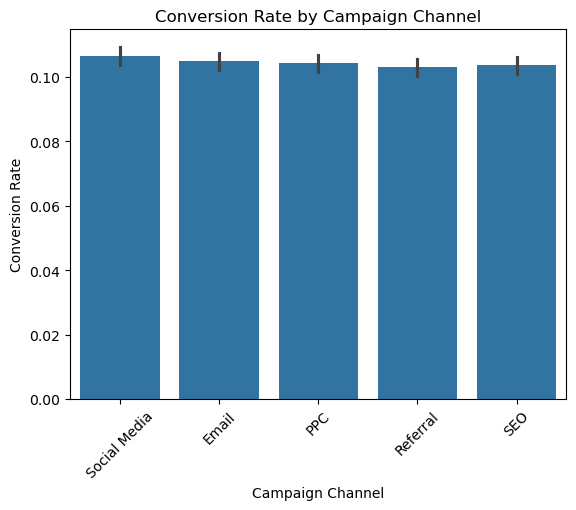

In [83]:
sns.barplot(x='CampaignChannel', y='ConversionRate', data=df)
plt.xlabel("Campaign Channel")
plt.ylabel("Conversion Rate")
plt.title("Conversion Rate by Campaign Channel")
plt.xticks(rotation=45)
plt.show()


# **Demography Analysis**

**1. Customer Demographics:** Visualize the distribution of customers by age, gender, and income.

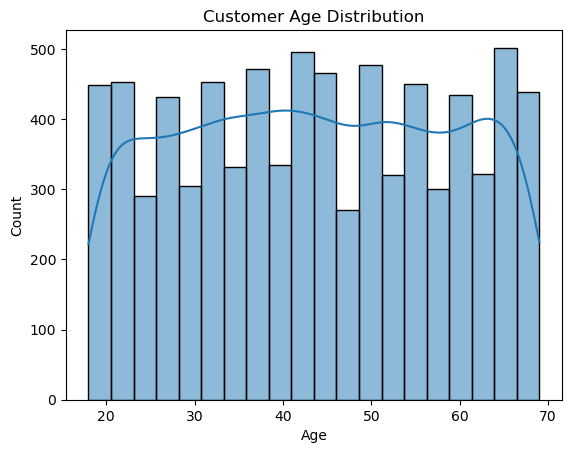

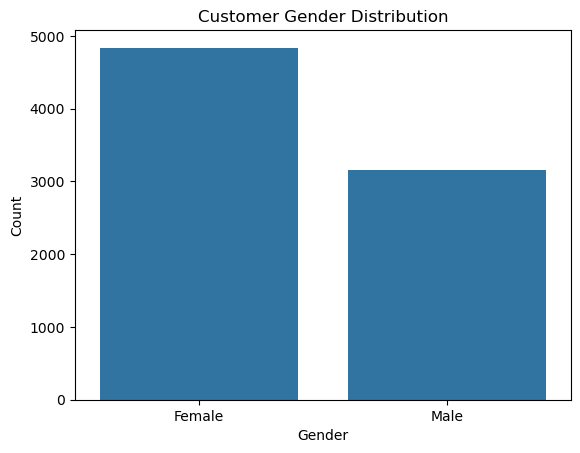

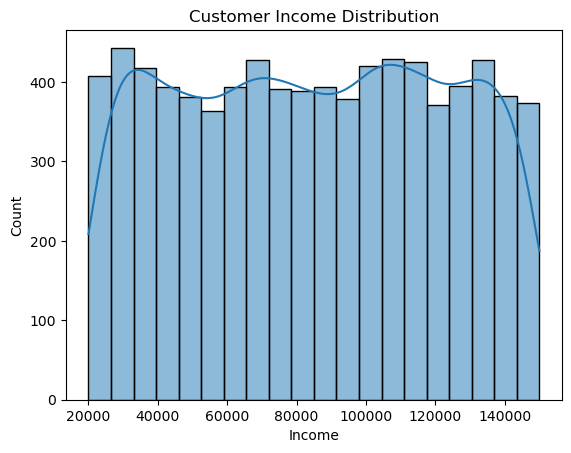

In [87]:
# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Customer Age Distribution")
plt.show()

# Gender distribution
sns.countplot(x='Gender', data=df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Customer Gender Distribution")
plt.show()

# Income distribution
sns.histplot(df['Income'], bins=20, kde=True)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Customer Income Distribution")
plt.show()


**2. Income Segmentation:**
To explore how income levels impact customer behavior, you can create a box plot

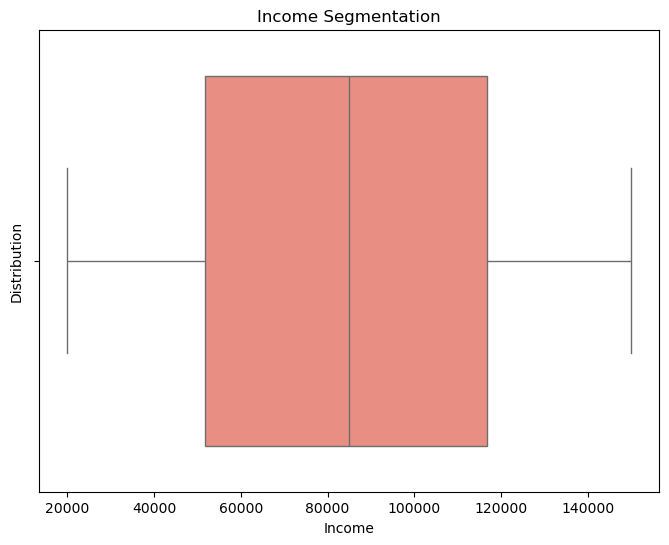

In [90]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Income', data=df, color='salmon')
plt.xlabel("Income")
plt.ylabel("Distribution")
plt.title("Income Segmentation")
plt.show()

**3. Channel-Specific Demographics:** To analyze customer demographics by campaign channel, create a bar plot or a grouped bar plot.

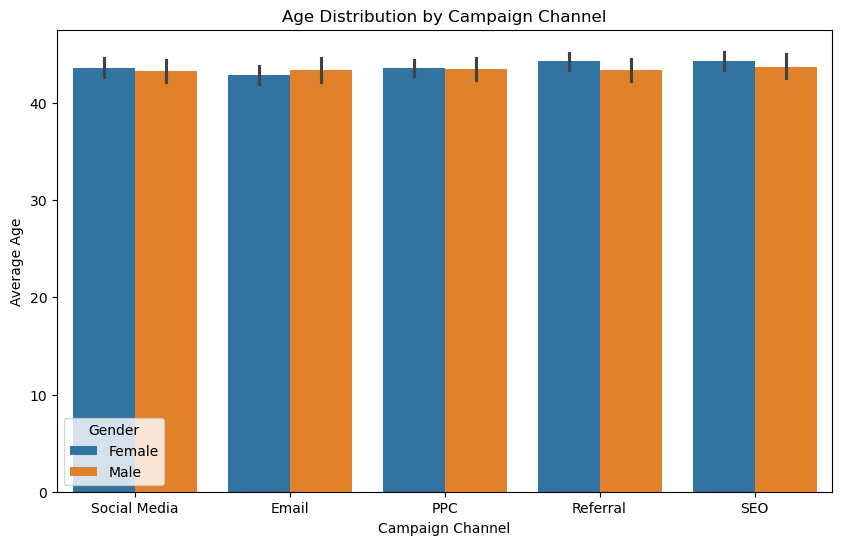

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CampaignChannel', y='Age', hue='Gender', data=df)
plt.xlabel("Campaign Channel")
plt.ylabel("Average Age")
plt.title("Age Distribution by Campaign Channel")
plt.legend(title="Gender")
plt.show()


# **Customer Retention Metrics:**

**1. Returning Visitors:**
To monitor returning visitors, you can track the number of unique users who visit your website more than once.

In [97]:
returning_visitors = len(df[df['WebsiteVisits'] > 1])
print(f"Number of Returning Visitors: {returning_visitors}")


Number of Returning Visitors: 7700


**2. Email Engagement:**
Measure email opens, clicks, and conversions based on available data (e.g., ‘EmailOpens’, ‘EmailClicks’, ‘Conversion’).

In [100]:
avg_email_opens = df['EmailOpens'].mean()
avg_email_clicks = df['EmailClicks'].mean()
print(f"Avg. Email Opens: {avg_email_opens:.2f}")
print(f"Avg. Email Clicks: {avg_email_clicks:.2f}")


Avg. Email Opens: 9.48
Avg. Email Clicks: 4.47


**3. Previous Purchases:**
Understand repeat purchase behavior by analyzing how many times customers made purchases.

In [103]:
repeat_purchase_count = len(df[df['PreviousPurchases'] > 1])
print(f"Number of Repeat Purchases: {repeat_purchase_count}")

Number of Repeat Purchases: 6368


# **Cost Related Charts**

**1. Ad Spend vs. Conversion:** To plot the relationship between advertising spend and conversion rates, you can use a scatter plot or a line plot.

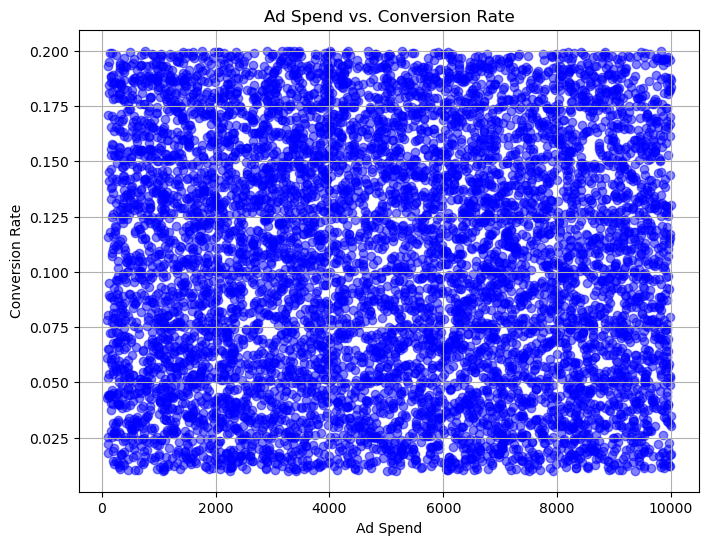

In [107]:
# Assuming your dataframe is named 'df'
plt.figure(figsize=(8, 6))
plt.scatter(df['AdSpend'], df['ConversionRate'], color='b', alpha=0.5)
plt.xlabel("Ad Spend")
plt.ylabel("Conversion Rate")
plt.title("Ad Spend vs. Conversion Rate")
plt.grid(True)
plt.show()


**No Clear Trend:** The points are scattered without a clear pattern, suggesting no strong correlation between ad spend and conversion rate within the data range presented.

**Variability in Conversion Rate:** Conversion rates vary widely at different ad spend levels, indicating that factors other than ad spend may significantly influence conversion rates.

**2. Cost Breakdown by Channel:**
Visualize how much you’re spending on each campaign channel using a bar plot.

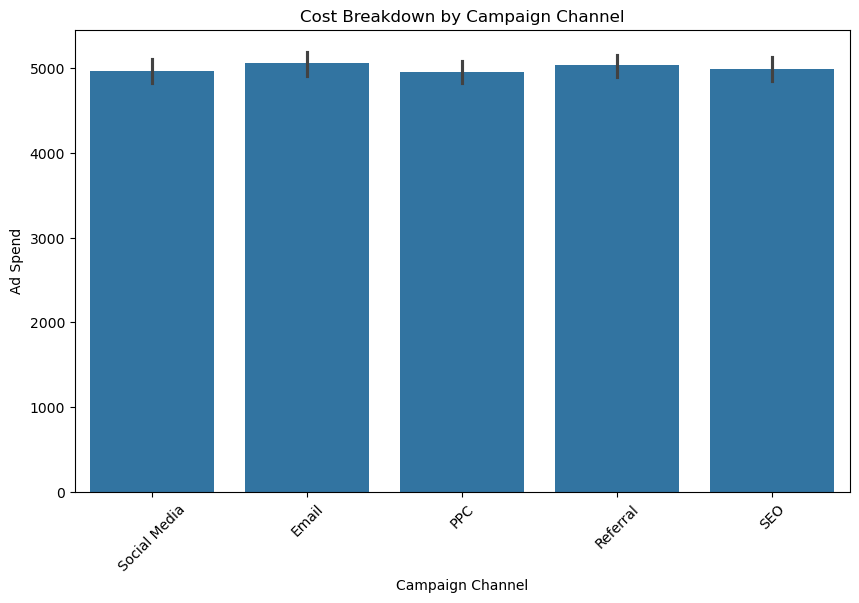

In [111]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CampaignChannel', y='AdSpend', data=df)
plt.xlabel("Campaign Channel")
plt.ylabel("Ad Spend")
plt.title("Cost Breakdown by Campaign Channel")
plt.xticks(rotation=45)
plt.show()

# **Predictive Modelling**

**Data Preprocessing**

In [115]:
X = df.drop(['CustomerID', 'Conversion'], axis =1)
y = df['Conversion']

In [117]:
# Handling Categorical variables in X

X = pd.get_dummies(X)

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier, StackingClassifier

The function apply_models takes features (X) and target labels (y) as input and performs the following tasks:

**Data Preprocessing:**

* Splits data into training and testing sets.
* Checks for class imbalance and applies SMOTE (oversampling) if needed.
* Scales the features using StandardScaler.

**Model Training and Evaluation:**

* Defines a set of machine learning classification models.
* Trains each model on the training data.
* Evaluates each model on the testing data using accuracy and F1 score.
* Prints detailed reports (accuracy, confusion matrix, classification report) for each model.

**Ensemble Learning:**

* Identifies the top 3 performing models based on F1 score.
* Creates two ensemble models (Voting Classifier and Stacking Classifier) using the top 3 models.
* Evaluates the ensemble models on the testing data using accuracy, confusion matrix, and classification report.
* In summary, this function is designed to explore various classification models, identify the best performing ones, and potentially improve performance through ensemble learning techniques.

In [121]:
def apply_models(X, y):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Check for class imbalance
    class_counts = np.bincount(y_train)
    min_samples = np.min(class_counts)
    max_samples = np.max(class_counts)
    imbalance_ratio = min_samples / max_samples
    
    if imbalance_ratio < 0.5:  # Adjusted threshold
        print(f"Class imbalance detected. Imbalance ratio: {imbalance_ratio:.2f}")
        if imbalance_ratio < 0.1:
            print("Severe imbalance. Applying SMOTE...")
            smote = SMOTE(random_state=42)
            X_train, y_train = smote.fit_resample(X_train, y_train)
        else:
            print("Moderate imbalance. Consider adjusting class weights in models.")
    
    
    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and test data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the models
    models = {
        'LogisticRegression': LogisticRegression(),
        'SVC': SVC(),
        'DecisionTree': DecisionTreeClassifier(),
        'RandomForest': RandomForestClassifier(),
        'ExtraTrees': ExtraTreesClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'GradientBoost': GradientBoostingClassifier(),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'LightGBM': LGBMClassifier(),
        'CatBoost': CatBoostClassifier(verbose=0)
    }

    # Initialize a dictionary to hold the performance of each model
    model_performance = {}

    # Apply each model
    for model_name, model in models.items():
        print(f"\n\033[1mClassification with {model_name}:\033[0m\n{'-' * 30}")
        
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Calculate the accuracy and f1 score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Store the performance in the dictionary
        model_performance[model_name] = (accuracy, f1)

        # Print the accuracy score
        print("\033[1m**Accuracy**:\033[0m\n", accuracy)

        # Print the confusion matrix
        print("\n\033[1m**Confusion Matrix**:\033[0m\n", confusion_matrix(y_test, y_pred))

        # Print the classification report
        print("\n\033[1m**Classification Report**:\033[0m\n", classification_report(y_test, y_pred))

    # Sort the models based on f1 score and pick the top 3
    top_3_models = sorted(model_performance.items(), key=lambda x: x[1][1], reverse=True)[:3]
    print("\n\033[1mTop 3 Models based on F1 Score:\033[0m\n", top_3_models)

    # Extract the model names and classifiers for the top 3 models
    top_3_model_names = [model[0] for model in top_3_models]
    top_3_classifiers = [models[model_name] for model_name in top_3_model_names]

    # Create a Voting Classifier with the top 3 models
    print("\n\033[1mInitializing Voting Classifier with top 3 models...\033[0m\n")
    voting_clf = VotingClassifier(estimators=list(zip(top_3_model_names, top_3_classifiers)), voting='hard')
    voting_clf.fit(X_train, y_train)
    y_pred = voting_clf.predict(X_test)
    print("\n\033[1m**Voting Classifier Evaluation**:\033[0m\n")
    print("\033[1m**Accuracy**:\033[0m\n", accuracy_score(y_test, y_pred))
    print("\n\033[1m**Confusion Matrix**:\033[0m\n", confusion_matrix(y_test, y_pred))
    print("\n\033[1m**Classification Report**:\033[0m\n", classification_report(y_test, y_pred))

    # Create a Stacking Classifier with the top 3 models
    print("\n\033[1mInitializing Stacking Classifier with top 3 models...\033[0m\n")
    stacking_clf = StackingClassifier(estimators=list(zip(top_3_model_names, top_3_classifiers)))
    stacking_clf.fit(X_train, y_train)
    y_pred = stacking_clf.predict(X_test)
    print("\n\033[1m**Stacking Classifier Evaluation**:\033[0m\n")
    print("\033[1m**Accuracy**:\033[0m\n", accuracy_score(y_test, y_pred))
    print("\n\033[1m**Confusion Matrix**:\033[0m\n", confusion_matrix(y_test, y_pred))
    print("\n\033[1m**Classification Report**:\033[0m\n", classification_report(y_test, y_pred))

In [128]:
# Apply the function on X and y
apply_models(X, y)

Class imbalance detected. Imbalance ratio: 0.14
Moderate imbalance. Consider adjusting class weights in models.

Classification with LogisticRegression:
------------------------------
**Accuracy**:
 0.8875

**Confusion Matrix**:
 [[  35  159]
 [  21 1385]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.62      0.18      0.28       194
           1       0.90      0.99      0.94      1406

    accuracy                           0.89      1600
   macro avg       0.76      0.58      0.61      1600
weighted avg       0.86      0.89      0.86      1600


Classification with SVC:
------------------------------
**Accuracy**:
 0.89375

**Confusion Matrix**:
 [[  35  159]
 [  11 1395]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.76      0.18      0.29       194
           1       0.90      0.99      0.94      1406

    accuracy                           0.89      1600
   macro 

C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**Accuracy**:
 0.910625

**Confusion Matrix**:
 [[  59  135]
 [   8 1398]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.88      0.30      0.45       194
           1       0.91      0.99      0.95      1406

    accuracy                           0.91      1600
   macro avg       0.90      0.65      0.70      1600
weighted avg       0.91      0.91      0.89      1600


Classification with GradientBoost:
------------------------------
**Accuracy**:
 0.91875

**Confusion Matrix**:
 [[  75  119]
 [  11 1395]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.87      0.39      0.54       194
           1       0.92      0.99      0.96      1406

    accuracy                           0.92      1600
   macro avg       0.90      0.69      0.75      1600
weighted avg       0.92      0.92      0.90      1600


Classification with XGBoost:
------------------------------
**Accuracy*

C:\Users\ashis\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**Accuracy**:
 0.924375

**Confusion Matrix**:
 [[  86  108]
 [  13 1393]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.87      0.44      0.59       194
           1       0.93      0.99      0.96      1406

    accuracy                           0.92      1600
   macro avg       0.90      0.72      0.77      1600
weighted avg       0.92      0.92      0.91      1600


Top 3 Models based on F1 Score:
 [('CatBoost', (0.924375, 0.9133506770171094)), ('LightGBM', (0.920625, 0.9100292397155174)), ('XGBoost', (0.916875, 0.9073847332251972))]

Initializing Voting Classifier with top 3 models...

[LightGBM] [Info] Number of positive: 5606, number of negative: 794
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2066
[LightGBM] [Info] Number of data points in the train set: 6400, number of used 

C:\Users\ashis\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 5606, number of negative: 794
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2066
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.875938 -> initscore=1.954509
[LightGBM] [Info] Start training from score 1.954509


C:\Users\ashis\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 4484, number of negative: 636
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2066
[LightGBM] [Info] Number of data points in the train set: 5120, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.875781 -> initscore=1.953072
[LightGBM] [Info] Start training from score 1.953072
[LightGBM] [Info] Number of positive: 4485, number of negative: 635
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2066
[LightGBM] [Info] Number of data points in the train set: 5120, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.875977 -> initscore=1.954869
[LightGBM] [Info] Start training from score 1.954869
[LightGBM] [Info] Number

C:\Users\ashis\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



**Stacking Classifier Evaluation**:

**Accuracy**:
 0.935625

**Confusion Matrix**:
 [[ 110   84]
 [  19 1387]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.85      0.57      0.68       194
           1       0.94      0.99      0.96      1406

    accuracy                           0.94      1600
   macro avg       0.90      0.78      0.82      1600
weighted avg       0.93      0.94      0.93      1600

